In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# загружаем данные
df = pd.read_csv('milk production.csv',';', index_col=['month'], parse_dates=['month'], dayfirst=True)
print('shape:', df.shape)

shape: (168, 1)


D:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.head()

,milk
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [4]:
df.columns

Index(['milk'], dtype='object')

In [5]:
df['milk'].axes

[DatetimeIndex(['1962-01-01', '1962-02-01', '1962-03-01', '1962-04-01',
                '1962-05-01', '1962-06-01', '1962-07-01', '1962-08-01',
                '1962-09-01', '1962-10-01',
                ...
                '1975-03-01', '1975-04-01', '1975-05-01', '1975-06-01',
                '1975-07-01', '1975-08-01', '1975-09-01', '1975-10-01',
                '1975-11-01', '1975-12-01'],
               dtype='datetime64[ns]', name='month', length=168, freq=None)]

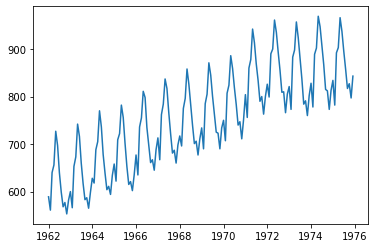

In [6]:
# строим график ежемесячного уровня производства молока в фунтах на одну корову
fig, axs = plt.subplots()
axs.plot(df['milk'].axes[-1], df['milk'].values)

In [7]:
import statsmodels.api as sm

# критерий Дики-Фуллера
sm.tsa.stattools.adfuller(df['milk'].values)

(-1.3038115874221294,
 0.6274267086030316,
 13,
 154,
 {'1%': -3.473542528196209,
  '5%': -2.880497674144038,
  '10%': -2.576878053634677},
 1115.1730447395112)

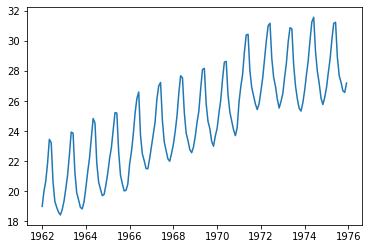

In [8]:
# поделим весь ряд на число дней в периоде, чтобы получить более гладкие данные
fig, axs = plt.subplots()
data =df['milk'].values / df['milk'].axes[-1].days_in_month
axs.plot(df['milk'].axes[-1], data)

In [9]:
sum(data)

4166.326661899464